In [111]:
%load_ext autoreload
%autoreload 2

home_or_office = "home"

import sys
if home_or_office =="home":
    sys.path.extend(['C:\\Code\\Libraries', 'C:/Code/Libraries'])
else:
    sys.path.extend(['C:\\Users\\troy\\Documents\\Code\\Libraries', 'C:\\Users\\troy\\Documents\\Excel Sheets', 
                     'C:/Users/troy/Documents/Code/Libraries'])

import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt

def generate_brownian_motion_paths(N, T, mu, sigma=1):
    """
    Generate N Brownian motion paths with T time steps.

    :param N: Number of paths
    :param T: Number of time steps
    :param mu: Drift coefficient
    :param sigma: Volatility coefficient (default is 1)
    :return: A matrix of size N x T with the Brownian paths
    """
    dt = 1.0 / T  # Time step
    paths = np.zeros((N, T))
    # Initial point is always zero for Brownian motion
    for t in range(1, T):
        random_shock = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt), size=N)
        paths[:, t] = paths[:, t-1] + random_shock

    return paths


def evaluate_bernstein_polynomial(coefficients, x):
    """
    Evaluate the value of a Bernstein polynomial at a point x.

    Args:
    coefficients (array-like): Coefficients of the Bernstein polynomial.
    x (float): The point at which to evaluate the polynomial.

    Returns:
    float: The value of the polynomial at x.
    """
    n = len(coefficients) - 1
    value = sum(comb(n, k) * coefficients[k] * (x ** k) * ((1 - x) ** (n - k)) for k in range(n + 1))
    return value


def objective_function(coefficients, paths):
    x = np.linspace(0, 1, paths.shape[1])  # Point at which to evaluate the polynomial
    threshold = evaluate_bernstein_polynomial(coefficients, x)
    
    running_max = np.maximum.accumulate(paths)
    running_min = np.minimum.accumulate(paths)
    DD = running_max - paths
    DU = paths - running_min
    objectives = []
    no_hit = []
    for (i, sample_path) in enumerate(paths):
        idx = np.where(DD[i] > threshold)[0]
        if idx.size == 0:
            no_hit.append(i)
        else:
            stop_step = idx[0]
            obj = (np.max(sample_path) - sample_path[stop_step])**2
            objectives.append(obj)
    return np.mean(objectives)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
from scipy.optimize import minimize

N =100000
T = 100
mu = 0.0
sigma = 1.0

paths = generate_brownian_motion_paths(N, T, mu, sigma)

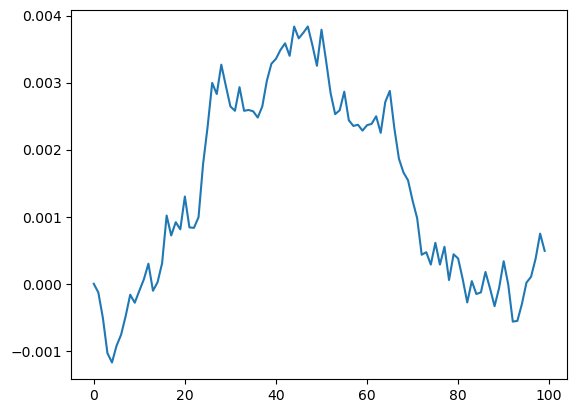

In [113]:
plt.plot(paths.mean(axis=0))

In [115]:
coefficients = [0.25] * 10
res = minimize(objective_function, coefficients, args=(paths), method='Nelder-Mead', bounds=[(0, np.inf)]*10)

In [101]:
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.7009315082656715
             x: [ 1.566e+01  0.000e+00  0.000e+00  2.575e+00]
           nit: 77
          nfev: 165
 final_simplex: (array([[ 1.566e+01,  0.000e+00,  0.000e+00,  2.575e+00],
                       [ 1.566e+01,  0.000e+00,  0.000e+00,  2.575e+00],
                       ...,
                       [ 1.566e+01,  0.000e+00,  0.000e+00,  2.575e+00],
                       [ 1.566e+01,  0.000e+00,  0.000e+00,  2.575e+00]]), array([ 7.009e-01,  7.009e-01,  7.009e-01,  7.009e-01,
                        7.009e-01]))

In [105]:
from scipy import stats
2 * stats.norm.cdf(1.12) - 1

0.7372862379145386

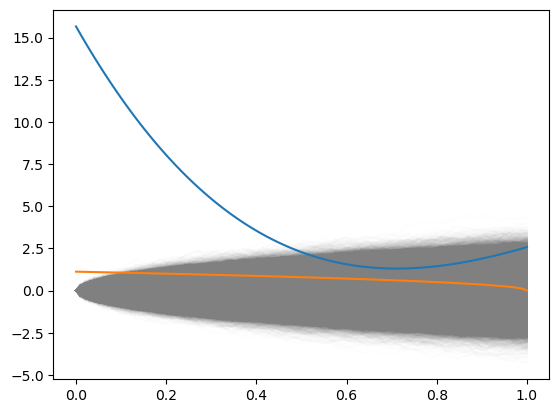

In [108]:
coefficients = res.x  # Coefficients for a 3rd degree Bernstein polynomial

x = np.linspace(0, 1, 100)  # Point at which to evaluate the polynomial
plt.plot(x, paths.T, color='grey', alpha=0.01)
plt.plot(x, evaluate_bernstein_polynomial(coefficients, x))
plt.plot(x, 1.12 * np.sqrt(1-x))

In [110]:
import os
import hashlib 
from pathlib import Path 

file_path = r"E:\MongoBackup\animations"
  
# Listing out all the files 
# inside our root folder. 
list_of_files = os.walk(file_path) 
  
# In order to detect the duplicate 
# files we are going to define an empty dictionary. 
unique_files = dict() 
  
for root, folders, files in list_of_files: 
  
    # Running a for loop on all the files 
    for file in files: 
  
        # Finding complete file path 
        file_path = Path(os.path.join(root, file)) 
  
        # Converting all the content of 
        # our file into md5 hash. 
        Hash_file = hashlib.md5(open(file_path, 'rb').read()).hexdigest() 
  
        # If file hash has already # 
        # been added we'll simply delete that file 
        if Hash_file not in unique_files: 
            unique_files[Hash_file] = file_path 
        else: 
            os.remove(file_path) 
            print(f"{file_path} has been deleted") 


In [52]:
coefficients = [0.25, 0.25, 0.25, 0.25] 

threshold = evaluate_bernstein_polynomial(coefficients, x)
running_max = np.maximum.accumulate(paths)
running_min = np.minimum.accumulate(paths)
DD = running_max - paths
DU = paths - running_min

objectives = np.zeros(N)
no_hit = []
for (i, sample_path) in enumerate(paths):
    idx = np.where(DD[i] > threshold)[0]
    if idx.size == 0:
        no_hit.append(i) 
    else:
        stop_step = idx[0] + 1
        obj = (np.max(sample_path) - sample_path[stop_step])**2
        objectives[i] = obj

print(np.mean(objectives), len(no_hit))
# sample_path = paths[no_hit[4]]
# plt.plot(np.maximum.accumulate(sample_path) - sample_path)
# plt.plot(threshold)

0.9855856569946909 1


((array([   1,    1,    1, ..., 9999, 9999, 9999], dtype=int64),
  array([ 4,  5,  6, ..., 97, 98, 99], dtype=int64)),
 array([0.24068813, 0.26357409, 0.260884  , 0.28074096, 0.34403298,
        0.30807419, 0.50723328]))

In [53]:


objective_function(coefficients)

1.0026861041757096